In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
dataset = pd.read_excel("RAWLOT1.xlsx")
dataset.head()

,UHID,Patients Name,Age,Gender,RAMJA Result,AIIMS Result culture,E.coli,K. Pneumoniae,P.aurogenosa,A.baumnnii,P.mirabilis,S. aureus,E.faecalis,S. saprophyticus,Fever,BP,HR
0,20220065432,Sahroj,33.0,F,Enterococcus faecalis,Enterococcus faecalis,NaN,NaN,-5.26086,-4.09794,-3.58480,-5.62819,-8.10731,NaN,98.2,110/76,106.0
1,20240016182,Shyanu,70.0,F,NaN,NaN,-6.63325,-10.1276,-8.30086,-13.22480,-11.94120,-14.93870,-13.64090,NaN,98.3,112/76,105.0
2,20230125389,Saloni,19.0,F,E.Coli. and K.pne,E.coli,-15.30980,-10.0174,-9.09993,-8.30414,-5.06676,-8.77797,-5.42121,NaN,98.5,100/60,70.0
3,20180022685,Ravita,34.0,F,P. mirabilis,CONTAMINATION,-7.70704,-8.0891,-4.79176,-8.63416,-11.84570,-9.90339,-9.31657,NaN,98.6,105/80,85.0
4,20201415102,Jyoti,28.0,F,NaN,NaN,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,99.0,115/100,95.0


In [9]:
data = pd.read_excel("RAWLOT1.xlsx")
data = dataset[['UHID','RAMJA Result','AIIMS Result culture']]
data.columns = ['UHID','RAMJA','AIIMS']
data_sym = dataset[['UHID','Fever','BP','HR']]
data.head()

,UHID,RAMJA,AIIMS
0,20220065432,Enterococcus faecalis,Enterococcus faecalis
1,20240016182,NaN,NaN
2,20230125389,E.Coli. and K.pne,E.coli
3,20180022685,P. mirabilis,CONTAMINATION
4,20201415102,NaN,NaN


In [126]:
data_sym[['BP_Sys','BP_Dia']] = data_sym['BP'].str.split("/",expand=True)

# Optionally, convert to numeric if you want to perform calculations
data_sym['BP_Sys'] = pd.to_numeric(data_sym['BP_Sys'], errors='coerce')
data_sym['BP_Dia'] = pd.to_numeric(data_sym['BP_Dia'], errors='coerce')

print(data_sym.head())
#data_sym.head()

          UHID  Fever       BP     HR  BP_Sys BP_dia  BP_Dia
0  20220065432   98.2   110/76  106.0     110     76      76
1  20240016182   98.3   112/76  105.0     112     76      76
2  20230125389   98.5   100/60   70.0     100     60      60
3  20180022685   98.6   105/80   85.0     105     80      80
4  20201415102   99.0  115/100   95.0     115    100     100


In [127]:
data_sym.describe()

,UHID,Fever,HR,BP_Sys,BP_Dia
count,1.030000e+02,103.000000,103.000000,103.000000,103.000000
mean,2.023386e+10,98.219417,90.145631,121.427184,74.339806
std,1.316375e+07,0.748601,13.652126,14.850630,13.113796
min,2.018002e+10,97.000000,58.000000,96.000000,36.000000
25%,2.023017e+10,98.000000,81.000000,112.000000,65.500000
50%,2.024002e+10,98.000000,89.000000,118.000000,74.000000
75%,2.024005e+10,98.600000,97.500000,130.000000,80.000000
max,2.024009e+10,102.000000,148.000000,168.000000,118.000000


In [22]:
#df_nan.to_excel('compareddata.xlsx', sheet_name='Null data')

In [13]:
import re
def cleanup(text):
    text = str(text)
    text = text.upper()
    text = text.replace(".", " ")
    text = text.replace(" AND", ",")
    text = text.replace(" &", ",")
    text = text.replace("POLYMICROBIAL (", "")
    text = text.replace("AUROGENOSA", "AERUGINOSA")
    text = re.sub(r'\s+', ' ', text)  # Use re.sub for regular expression replacement
    text = text.strip()
    return text


In [14]:
bacteriatypes = {
    "COLI" : 'Escherichia coli', 
    "PNE" : 'Klebsiella pneumoniae',
    "AERUGI" : 'Pseudomonas aeruginosa',
    "BAUM" : 'Acinetobacter baumannii', 
    "MIRABIL" : 'Proteus mirabilis', 
    "FAECALI" : 'Enterococcus faecalis', 
    "AUREUS" : 'Staphylococcus aureus', 
    "SAPROPHY" : 'Staphylococcus saprophyticus',
    "STERI" : 'Sterile',
    "CONTA" : 'Contamination',
    "NAN" : 'NAN'
}

In [15]:
data['cleanRAMJA'] = data['RAMJA'].apply(cleanup)
data['cleanAIIMS'] = data['AIIMS'].apply(cleanup)

C:\Users\neelesh\AppData\Local\Temp\ipykernel_2040\4174382849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleanRAMJA'] = data['RAMJA'].apply(cleanup)
C:\Users\neelesh\AppData\Local\Temp\ipykernel_2040\4174382849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleanAIIMS'] = data['AIIMS'].apply(cleanup)


In [17]:
#..FUNCTION TO CHECK IF TEST STRINGS(S1 OR S2) PRESENT IN MAIN STRING 
def check(mainstring, s1, s2):
    if (mainstring.count(s1) > 0 or mainstring.count(s2) > 0):
        #print("YES")
        return(1)
    else:
        #print("NO")
        return(0)

In [18]:
data.shape

(131, 5)

### RAMJA Analysis

In [19]:
df_R = data.copy()
genus = ["ESCHER","KLEBS","PSEUDO","ACINE","PROT","ENTER","AURE","SAPRO","STERI","CONTA","NAN"]
species = ["COLI", "PNE", "AERUGI", "BAUM", "MIRABIL", "FAECALI", "AUREUS", "SAPROPHY", "STERI","CONTA","NAN"]
for s1, s2 in zip(genus,species):
    df_R[s2] = df_R['cleanRAMJA'].apply(lambda x: check(x, s1, s2))

df_R.rename(columns=bacteriatypes, inplace=True) #change column names
# add suffix _R to column names
# columns_to_modify = ['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Sterile','Contamination','NAN']
# data.rename(columns={col: f"{col}_R" for col in columns_to_modify}, inplace=True)

In [20]:
df_R.shape

(131, 16)

In [21]:
#....add a column named 'Others' contain values other than assigend catagories
df_R_temp = df_R[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Sterile','Contamination','NAN']]
df_R_temp = df_R_temp == 0
df_R_temp['Others_R'] = df_R_temp.all(axis=1)
df_R['Others_R'] = df_R_temp['Others_R'].astype(int)
df_R.shape

(131, 17)

In [22]:
df_R.head()

,UHID,RAMJA,AIIMS,cleanRAMJA,cleanAIIMS,Escherichia coli,Klebsiella pneumoniae,Pseudomonas aeruginosa,Acinetobacter baumannii,Proteus mirabilis,Enterococcus faecalis,Staphylococcus aureus,Staphylococcus saprophyticus,Sterile,Contamination,NAN,Others_R
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,ENTEROCOCCUS FAECALIS,ENTEROCOCCUS FAECALIS,0,0,0,0,0,1,0,0,0,0,0,0
1,20240016182,NaN,NaN,NAN,NAN,0,0,0,0,0,0,0,0,0,0,1,0
2,20230125389,E.Coli. and K.pne,E.coli,"E COLI , K PNE",E COLI,1,1,0,0,0,0,0,0,0,0,0,0
3,20180022685,P. mirabilis,CONTAMINATION,P MIRABILIS,CONTAMINATION,0,0,0,0,1,0,0,0,0,0,0,0
4,20201415102,NaN,NaN,NAN,NAN,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
#...Get infections positive column in RAMJA
df_R_temp  = df_R[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Contamination','Others_R']]
df_R_temp = df_R_temp == 1
df_R_temp['Infection_R'] = df_R_temp.any(axis=1)
df_R['Infection_R'] = df_R_temp['Infection_R'].astype(int)
df_R.shape

(131, 18)

In [24]:
#....Drop rows containing NaN in Ramaj column results
df_NonNaN_R = df_R.dropna(subset=['RAMJA'])
df_NonNaN_R.shape
df_R_clean = df_NonNaN_R

In [25]:
#display(df_NonNaN_R)

In [26]:
#...Remove contaminated sample and Others samples
# df_R_clean = df_NonNaN_R[(df_NonNaN_R['Contamination'] == 0) & (df_NonNaN_R['Others_R'] == 0)]
# df_R_clean.shape

In [27]:
#....After Dopping NaN these two set of values should be equal
print(df_R_clean['Infection_R'].value_counts())
print(df_R_clean['Sterile'].value_counts())

1    70
0    55
Name: Infection_R, dtype: int64
0    70
1    55
Name: Sterile, dtype: int64


In [28]:
#df_R.to_excel("temp1.xlsx")

### AIIMS Analysis

In [29]:
data.shape

(131, 5)

In [30]:
df_A = data.copy()
genus = ["ESCHER","KLEBS","PSEUDO","ACINE","PROT","ENTER","AURE","SAPRO","STERI","CONTA","NAN"]
species = ["COLI", "PNE", "AERUGI", "BAUM", "MIRABIL", "FAECALI", "AUREUS", "SAPROPHY", "STERI","CONTA","NAN"]
for s1, s2 in zip(genus,species):
    df_A[s2] = df_A['cleanAIIMS'].apply(lambda x: check(x, s1, s2))

df_A.rename(columns=bacteriatypes, inplace=True) #change column names

# add suffix _R to column names
#columns_to_modify = ['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Sterile','Contamination','NAN']
#data.rename(columns={col: f"{col}_A" for col in columns_to_modify}, inplace=True)

In [31]:
df_A.shape

(131, 16)

In [32]:
#....add a column named 'Others' contain values other than assigend catagories
df_A_temp = df_A[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Sterile','Contamination','NAN']]
df_A_temp = df_A_temp == 0
df_A_temp['Others_A'] = df_A_temp.all(axis=1)
df_A['Others_A'] = df_A_temp['Others_A'].astype(int)
df_A.shape

(131, 17)

In [33]:
df_A.head()

,UHID,RAMJA,AIIMS,cleanRAMJA,cleanAIIMS,Escherichia coli,Klebsiella pneumoniae,Pseudomonas aeruginosa,Acinetobacter baumannii,Proteus mirabilis,Enterococcus faecalis,Staphylococcus aureus,Staphylococcus saprophyticus,Sterile,Contamination,NAN,Others_A
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,ENTEROCOCCUS FAECALIS,ENTEROCOCCUS FAECALIS,0,0,0,0,0,1,0,0,0,0,0,0
1,20240016182,NaN,NaN,NAN,NAN,0,0,0,0,0,0,0,0,0,0,1,0
2,20230125389,E.Coli. and K.pne,E.coli,"E COLI , K PNE",E COLI,1,0,0,0,0,0,0,0,0,0,0,0
3,20180022685,P. mirabilis,CONTAMINATION,P MIRABILIS,CONTAMINATION,0,0,0,0,0,0,0,0,0,1,0,0
4,20201415102,NaN,NaN,NAN,NAN,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
#...Get infections positive (any infection) in AIIMS
df_A_temp  = df_A[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus','Contamination','Others_A']]
df_A_temp = df_A_temp == 1
df_A_temp['Infection_A'] = df_A_temp.any(axis=1)
df_A['Infection_A'] = df_A_temp['Infection_A'].astype(int)
df_A.shape


(131, 18)

In [35]:
#...dataset containing removed NaN based on AIIMS
df_NonNaN_A = df_A.dropna(subset=['AIIMS'])
df_A_clean = df_NonNaN_A

In [36]:
#...Remove contaminated sample and Others samples 
# df_A_clean = df_NonNaN_A[(df_NonNaN_A['Contamination'] == 0) & (df_NonNaN_A['Others_A'] == 0)]
# df_A_clean.shape

In [37]:
#....After Dopping NaN these two set of values should be equal
print(df_A_clean['Infection_A'].value_counts())
print(df_A_clean['Sterile'].value_counts())

1    58
0    56
Name: Infection_A, dtype: int64
0    58
1    56
Name: Sterile, dtype: int64


In [38]:
#df_NonNaN_A.to_excel("temp1.xlsx")

In [39]:
#......
df_R_infec = df_R_clean[df_R_clean['Infection_R'] == 1]
df_R_infec = df_R_infec[['UHID','RAMJA','AIIMS']]
df_R_infec.shape

(70, 3)

In [40]:
df_A_infec = df_A_clean[df_A_clean['Infection_A'] == 1]
df_A_infec = df_A_infec[['UHID','RAMJA','AIIMS']]
df_A_infec.shape

(58, 3)

### Concordance analysis

In [41]:
#...Concordance: Get same type of infections in both RAMJA and AIIMS
df_R_temp1  = df_R[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus']]
df_A_temp1  = df_A[['Escherichia coli','Klebsiella pneumoniae','Pseudomonas aeruginosa','Acinetobacter baumannii','Proteus mirabilis','Enterococcus faecalis','Staphylococcus aureus','Staphylococcus saprophyticus']]
df_C_temp1 = df_R_temp1 & df_A_temp1
df_C_temp1['Infection_C'] = df_C_temp1.any(axis=1)
df_C = data[['UHID','RAMJA','AIIMS']]
df_C['concordance'] = df_C_temp1['Infection_C'].astype(int)
df_C.head()

C:\Users\neelesh\AppData\Local\Temp\ipykernel_2040\3825133095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_C['concordance'] = df_C_temp1['Infection_C'].astype(int)


,UHID,RAMJA,AIIMS,concordance
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,1
1,20240016182,NaN,NaN,0
2,20230125389,E.Coli. and K.pne,E.coli,1
3,20180022685,P. mirabilis,CONTAMINATION,0
4,20201415102,NaN,NaN,0


In [43]:
df_C.shape

(131, 4)

In [44]:
df_C['concordance'].value_counts()

0    106
1     25
Name: concordance, dtype: int64

In [45]:
df_NonNaN_C = df_C.dropna(subset=['RAMJA','AIIMS'])

In [46]:
df_NonNaN_C.shape

(112, 4)

### common clean samples

In [47]:
df_R_tempc = df_R_clean[['UHID','RAMJA','AIIMS', 'Infection_R']]
df_R_tempc.shape

(125, 4)

In [48]:
df_A_tempc = df_A_clean[['UHID','Infection_A']]
df_A_tempc.shape

(114, 2)

In [49]:
#..clean datset having common samples with No Nan, No contamination, No Others
df_C_clean = pd.merge(df_R_tempc,df_A_tempc,how='inner', on='UHID')
df_C_clean.shape

(112, 5)

In [50]:
df_C_clean.head()

,UHID,RAMJA,AIIMS,Infection_R,Infection_A
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,1,1
1,20230125389,E.Coli. and K.pne,E.coli,1,1
2,20180022685,P. mirabilis,CONTAMINATION,1,1
3,20240012395,"Polymicrobial (E.coli, A. baumannii, P.mirabil...",E.coli,1,1
4,20220166372,"E.coli, Pseudomonas, P.mirabilis, E.Faecalis, ...",E.coli & Pseudomnas,1,1


#### Confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix

y_true = df_C_clean['Infection_A']
y_pred = df_C_clean['Infection_R']

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[38 18]
 [10 46]]


In [52]:
sum(sum(cm))

112

In [53]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn,fp,fn,tp)

(38, 18, 10, 46)

In [54]:
t_cm = np.array([tp, fp, fn, tn]).reshape(2,2)
t_cm

array([[46, 18],
       [10, 38]], dtype=int64)

In [55]:
df_cm =pd.DataFrame(t_cm,index=['RAMJA Positive','RAMJA Negative'], columns= ['AIIMS Positive','AIIMS Negative'])
df_cm

,AIIMS Positive,AIIMS Negative
RAMJA Positive,46,18
RAMJA Negative,10,38


#### Scores

In [56]:
def scores(y_test, y_pred):
        #y_pred = self.fit(x_train, x_test, y_train)
        from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
        
        cm = confusion_matrix(y_test,y_pred)
        
        # Compute confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
                
        #.....................Accuracy......................#
        #accur = accuracy_score(y_test,y_pred)
        accur = (tp + tn)/(tp+tn+fp+fn)
        
       #.....................Senstivity.....................#
        sens = tp/(tp + fn)

        #.....................Specificity...................#
        spec = tn / (tn + fp)

        #..........Positive predictive value (PPV)...........#
        PPV = tp/(tp + fp)

        #..........negative predictive value (NPV)...........#
        NPV = tn/(tn + fn)
        
        #..........Positive Likelihood ratio (PLR)...........#
        PLR = sens/(1-spec)

        #..........Negative Likelihood ratio (NLR)...........#
        NLR = (1-sens)/spec

        errorList = np.array([accur, sens, spec, PPV, NPV, PLR, NLR])
        return(errorList)

In [57]:
scores(y_true,y_pred)
scoreid = ['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'PLR', 'NLR']
df_score = pd.DataFrame(scores(y_true,y_pred),index=scoreid, columns= ['LOT1'])
df_score = round(df_score,4)
df_score

,LOT1
Accuracy,0.7500
Sensitivity,0.8214
Specificity,0.6786
PPV,0.7188
NPV,0.7917
PLR,2.5556
NLR,0.2632


In [44]:
""" print("#..........RAMJA Details..........#")
#......VAlies for both RAMJA and AIIMS
print("Total samples: ", data.shape[0])

#...Values for RAMJA
print("Null Samples RAMJA: ",data['RAMJA'].isnull().sum(axis=0))
print("Non-Null RAMJA: ", data['RAMJA'].count())

#...VAlues for RAMJA after dropping NaN
print("Contaminated Samples RAMJA: ", df_NonNaN_R['Contamination'].sum())
print("Other RAMJA: ", df_NonNaN_R['Others_R'].sum())
print("Positive RAMJA: ", df_NonNaN_R['Infection_R'].sum())
print("Negative RAMJA: ", df_NonNaN_R['Sterile'].sum())

print("#..........AIIMS Details..........#")
#...Values for AIIMS
print("Total samples: ", data.shape[0])
print("Null Samples AIIMS: ",data['AIIMS'].isnull().sum(axis=0))
print("Non-Null AIIMS: ", data['AIIMS'].count())

#...VAlues for RAMJA after dropping NaN
print("Contaminated Samples AIIMS: ", df_NonNaN_A['Contamination'].sum())
print("Other AIIMS: ", df_NonNaN_A['Others_A'].sum())
print("Positive AIIMS: ", df_NonNaN_A['Infection_A'].sum())
print("Negative AIIMS: ", df_NonNaN_A['Sterile'].sum())
 """

' print("#..........RAMJA Details..........#")\n#......VAlies for both RAMJA and AIIMS\nprint("Total samples: ", data.shape[0])\n\n#...Values for RAMJA\nprint("Null Samples RAMJA: ",data[\'RAMJA\'].isnull().sum(axis=0))\nprint("Non-Null RAMJA: ", data[\'RAMJA\'].count())\n\n#...VAlues for RAMJA after dropping NaN\nprint("Contaminated Samples RAMJA: ", df_NonNaN_R[\'Contamination\'].sum())\nprint("Other RAMJA: ", df_NonNaN_R[\'Others_R\'].sum())\nprint("Positive RAMJA: ", df_NonNaN_R[\'Infection_R\'].sum())\nprint("Negative RAMJA: ", df_NonNaN_R[\'Sterile\'].sum())\n\nprint("#..........AIIMS Details..........#")\n#...Values for AIIMS\nprint("Total samples: ", data.shape[0])\nprint("Null Samples AIIMS: ",data[\'AIIMS\'].isnull().sum(axis=0))\nprint("Non-Null AIIMS: ", data[\'AIIMS\'].count())\n\n#...VAlues for RAMJA after dropping NaN\nprint("Contaminated Samples AIIMS: ", df_NonNaN_A[\'Contamination\'].sum())\nprint("Other AIIMS: ", df_NonNaN_A[\'Others_A\'].sum())\nprint("Positive AIIM

#### Samples detail

In [58]:
samplesDetail = {
    "Total Samples": [data.shape[0],data.shape[0]],
    "Blank Results": [data['RAMJA'].isnull().sum(axis=0), data['AIIMS'].isnull().sum(axis=0)],
    "Non-Blank Results": [data['RAMJA'].count(),data['AIIMS'].count()],
    "Contaminated Samples": [df_NonNaN_R['Contamination'].sum(),df_NonNaN_A['Contamination'].sum()],
    "Others": [df_NonNaN_R['Others_R'].sum(),df_NonNaN_A['Others_A'].sum()],
    "Common samples":  [df_NonNaN_C.shape[0], df_NonNaN_C.shape[0]],
    #"Useful Samples":[df_R_clean.shape[0], df_A_clean.shape[0]],
    "Positive": [df_NonNaN_R['Infection_R'].sum(),df_NonNaN_A['Infection_A'].sum()],
    "Negative": [df_NonNaN_R['Sterile'].sum(),df_NonNaN_A['Sterile'].sum()],
    "Common Positive": [tp,tp],
    "Concordance [Common bacteria]": [df_C['concordance'].sum(),df_C['concordance'].sum()],
    "Common Negative": [tn,tn]
    
}

In [59]:
df_samplesDetail = pd.DataFrame(samplesDetail, index=['RAMJA','AIIMS']).T
df_samplesDetail

,RAMJA,AIIMS
Total Samples,131,131
Blank Results,6,17
Non-Blank Results,125,114
Contaminated Samples,0,17
Others,0,9
Common samples,112,112
Positive,70,58
Negative,55,56
Common Positive,46,46
Concordance [Common bacteria],25,25


#### Export matrices to excel

In [60]:
# Write the DataFrames to an Excel file
with pd.ExcelWriter('matrices2.xlsx') as writer:
    df_samplesDetail.to_excel(writer, sheet_name='SamplesDetail', index=True)
    df_cm.to_excel(writer, sheet_name='ConfusionMatrix', index=True)
    df_score.to_excel(writer, sheet_name='Scores', index=True)
    


#### Sort the required dataset and export to excel

In [61]:
df_A_conta = df_NonNaN_A[df_NonNaN_A['Contamination'] ==1][['UHID', 'RAMJA', 'AIIMS']]
df_A_conta.shape

(17, 3)

In [62]:
df_A_others = df_NonNaN_A[df_NonNaN_A['Others_A'] ==1][['UHID', 'RAMJA', 'AIIMS']]
df_A_others.shape

(9, 3)

In [63]:
display(df_A_others)

,UHID,RAMJA,AIIMS
26,20240019044,E.coli & Klebsiella pneumonia,Candida spp.
70,20240034567,"A. baumannii, P.mirabilis, E. Faecalis",Insignificant growth
90,20240046542,P.Aurogenosa,Acintobacter spp.
96,20240074281,Sterile,Commensal Flora
104,20240028527,Sterile,Insignificant growth of colonizer
107,20240087671,"S.Aureus ,Saprohutics, and Mirababilis",Insignificant growth gram positive cocci
108,20230121277,E. coli and A.Baumini,Insignificant Gram negative bacilli
109,20240094465,"A. baumanni, P mirabilis, S saprophyticus",Candida spp. and Insignificant gram negative b...
110,20230156801,S.Saprophytics,Insignificant gram negative bacilli


In [64]:
#...Both positives
df_Pos_C = df_C_clean[(df_C_clean['Infection_R'] == 1) & (df_C_clean['Infection_A'] == 1)][['UHID', 'RAMJA', 'AIIMS']]
df_Pos_C.shape

(46, 3)

In [65]:
#...Both Negatives
df_Neg_C = df_C_clean[(df_C_clean['Infection_R'] == 0) & (df_C_clean['Infection_A']==0)][['UHID', 'RAMJA', 'AIIMS']]
df_Neg_C.shape

(38, 3)

In [66]:
#...Common type of infection
df_concordance = df_C[df_C['concordance'] == 1][['UHID','RAMJA','AIIMS']]
df_concordance.shape

(25, 3)

In [55]:
# Write the DataFrames to an Excel file
with pd.ExcelWriter('sorteddata2.xlsx') as writer:
    df_A_others.to_excel(writer, sheet_name='Undefined Samples_A', index=False)
    df_A_conta.to_excel(writer, sheet_name='Contaminated Samples_A', index=False)
    df_Pos_C.to_excel(writer, sheet_name='Common Positives', index=False)
    df_concordance.to_excel(writer, sheet_name='Concordance', index=False)
    df_Neg_C.to_excel(writer, sheet_name='Common Negatives', index=False)

In [128]:
data_sym = data_sym.dropna()

In [130]:
df_C_sym = pd.merge(df_C_clean,data_sym,how='inner', on='UHID')

In [131]:
df_C_sym.head()

,UHID,RAMJA,AIIMS,Infection_R,Infection_A,Fever,BP,HR,BP_Sys,BP_dia,BP_Dia
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,1,1,98.2,110/76,106.0,110,76,76
1,20230125389,E.Coli. and K.pne,E.coli,1,1,98.5,100/60,70.0,100,60,60
2,20180022685,P. mirabilis,CONTAMINATION,1,1,98.6,105/80,85.0,105,80,80
3,20240012395,"Polymicrobial (E.coli, A. baumannii, P.mirabil...",E.coli,1,1,98.8,140/100,93.0,140,100,100
4,20220166372,"E.coli, Pseudomonas, P.mirabilis, E.Faecalis, ...",E.coli & Pseudomnas,1,1,98.2,132/82,84.0,132,82,82


<Axes: xlabel='Infection_A', ylabel='HR'>

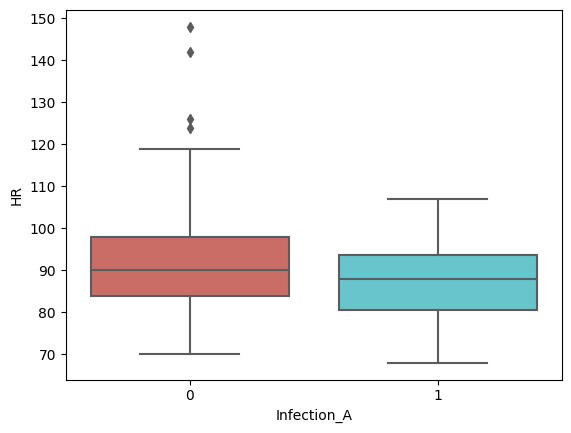

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Infection_A', y='HR', data=df_C_sym, palette='hls')

<Axes: xlabel='Infection_A', ylabel='Fever'>

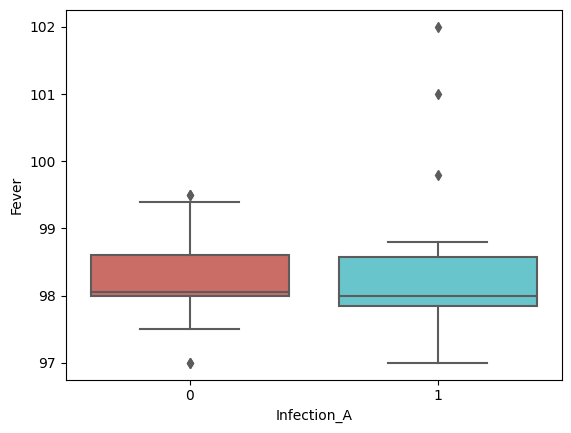

In [121]:
sns.boxplot(x='Infection_A', y='Fever', data=df_C_sym, palette='hls')

Text(0.5, 1.0, 'Boxplot of Y_Var2')

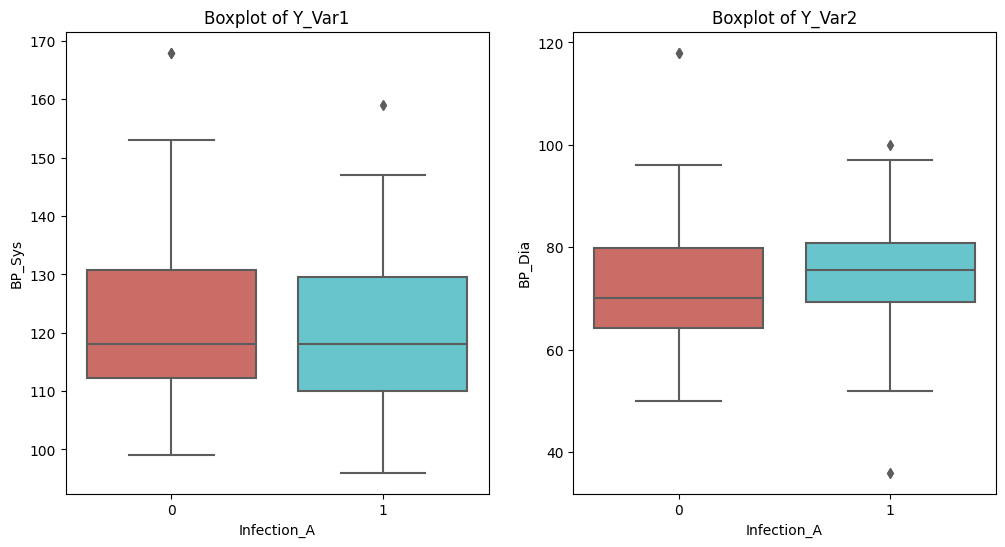

In [143]:
# Create subplots for side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Infection_A', y='BP_Sys', data=df_C_sym, ax = axes[0], palette='hls')
axes[0].set_title('Boxplot of Y_Var1')
sns.boxplot(x='Infection_A', y='BP_Dia', data=df_C_sym, ax=axes[1], palette='hls', dodge=True)
axes[1].set_title('Boxplot of Y_Var2')

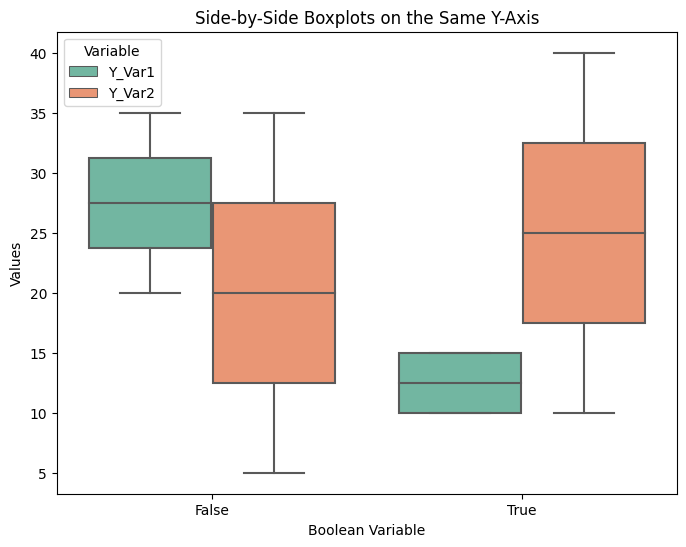

In [144]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'Boolean_Var': [True, False, True, False, True, False, True, False],
        'Y_Var1': [10, 20, 15, 25, 10, 30, 15, 35],
        'Y_Var2': [40, 35, 30, 25, 20, 15, 10, 5]}
df = pd.DataFrame(data)

# Reshape the DataFrame to a long format for plotting
df_melted = pd.melt(df, id_vars=['Boolean_Var'], value_vars=['Y_Var1', 'Y_Var2'], 
                    var_name='Variable', value_name='Value')

# Plotting the side-by-side boxplots on the same y-axis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Boolean_Var', y='Value', hue='Variable', data=df_melted, palette='Set2')

# Customize plot
plt.title("Side-by-Side Boxplots on the Same Y-Axis")
plt.ylabel("Values")
plt.xlabel("Boolean Variable")
plt.show()


<Axes: xlabel='Infection_A', ylabel='BP_Dia'>

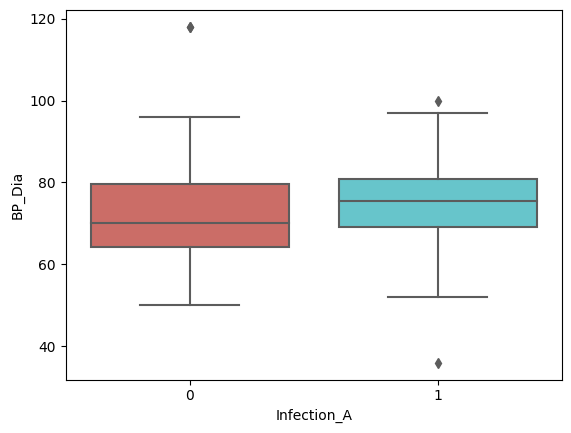

In [135]:
sns.boxplot(x='Infection_A', y='BP_Dia', data=df_C_sym, palette='hls')

In [106]:
data_sym.describe()

,UHID,Fever,HR
count,1.030000e+02,103.000000,103.000000
mean,2.023386e+10,98.219417,90.145631
std,1.316375e+07,0.748601,13.652126
min,2.018002e+10,97.000000,58.000000
25%,2.023017e+10,98.000000,81.000000
50%,2.024002e+10,98.000000,89.000000
75%,2.024005e+10,98.600000,97.500000
max,2.024009e+10,102.000000,148.000000


In [102]:
df_C_sym.describe()

,UHID,Infection_R,Infection_A,Fever,HR
count,8.800000e+01,88.000000,88.000000,88.000000,88.000000
mean,2.023358e+10,0.636364,0.522727,98.210227,90.556818
std,1.337255e+07,0.483802,0.502346,0.770884,13.807259
min,2.018002e+10,0.000000,0.000000,97.000000,68.000000
25%,2.023015e+10,0.000000,0.000000,98.000000,82.000000
50%,2.024002e+10,1.000000,1.000000,98.000000,88.500000
75%,2.024006e+10,1.000000,1.000000,98.600000,97.250000
max,2.024009e+10,1.000000,1.000000,102.000000,148.000000


In [91]:
display(df_C_sym)

,UHID,RAMJA,AIIMS,Infection_R,Infection_A,Fever,BP,HR,BP_Sys,BP_dia
0,20220065432,Enterococcus faecalis,Enterococcus faecalis,1,1,98.2,110/76,106.0,110,76
1,20230125389,E.Coli. and K.pne,E.coli,1,1,98.5,100/60,70.0,100,60
2,20180022685,P. mirabilis,CONTAMINATION,1,1,98.6,105/80,85.0,105,80
3,20240012395,"Polymicrobial (E.coli, A. baumannii, P.mirabil...",E.coli,1,1,98.8,140/100,93.0,140,100
4,20220166372,"E.coli, Pseudomonas, P.mirabilis, E.Faecalis, ...",E.coli & Pseudomnas,1,1,98.2,132/82,84.0,132,82
5,20230149608,"Polymicrobial (E. Coli, A.baumannii, Pseudomon...","E.coli,A.Baumini",1,1,102.0,110/62,82.0,110,62
6,20240016829,"E.Faecalis, S. aureus",Sterile,1,0,99.0,145/78,78.0,145,78
7,20230179067,"E. Coli, K. Pne, P.mirabilis",Sterile,1,0,97.8,130/89,87.0,130,89
8,20180188108,K. Pne,sterile,1,0,98.3,114/69,98.0,114,69
9,20230141608,"K. Pne, Pseudomonas, P.mirabilis",Contamination,1,1,98.6,159/97,92.0,159,97


In [89]:
df_C_sym.groupby('Infection_A').mean()

C:\Users\neelesh\AppData\Local\Temp\ipykernel_2040\2595907390.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_C_sym.groupby('Infection_A').mean()


,UHID,Infection_R,Fever,HR
Infection_A,,,,
0,2.023292e+10,0.380952,98.216667,93.976190
1,2.023419e+10,0.869565,98.204348,87.434783


#### ................Finish.....................